In [1]:
import sys
sys.path.append('../..')

import copy
import re
import csv
import codecs
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import load_six_emotions, load_3_emotions, generate_corpus, tokenizer
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [2]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]


print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
# emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

rep = [
    ('\n', '. '), ('"', ''), ('@', ''), 
    ('#', ''), ('RT', ''), (r'(http[s]*?:\/\/)+.*[\r\n]*', '')
]

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [14]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases_diversas.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases[:100]
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [15]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 592
--- 0.007880687713623047 seconds ---
Calculating SVD...
--- 0.007356166839599609 seconds ---
Processing emotional state...
--- 0.0038595199584960938 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.0048444271087646484 seconds ---
Calculating final emotional matrix...
--- 0.14240312576293945 seconds ---


In [11]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



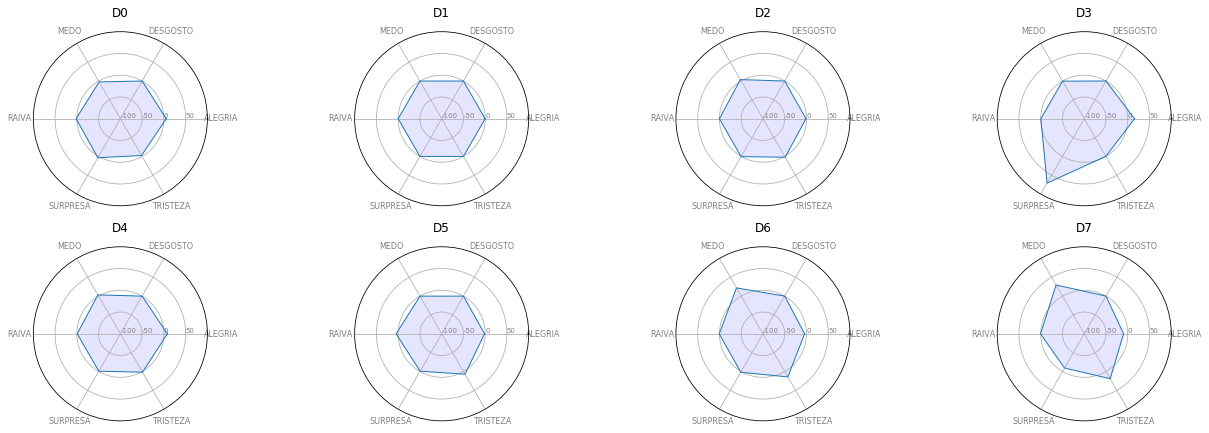

In [12]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

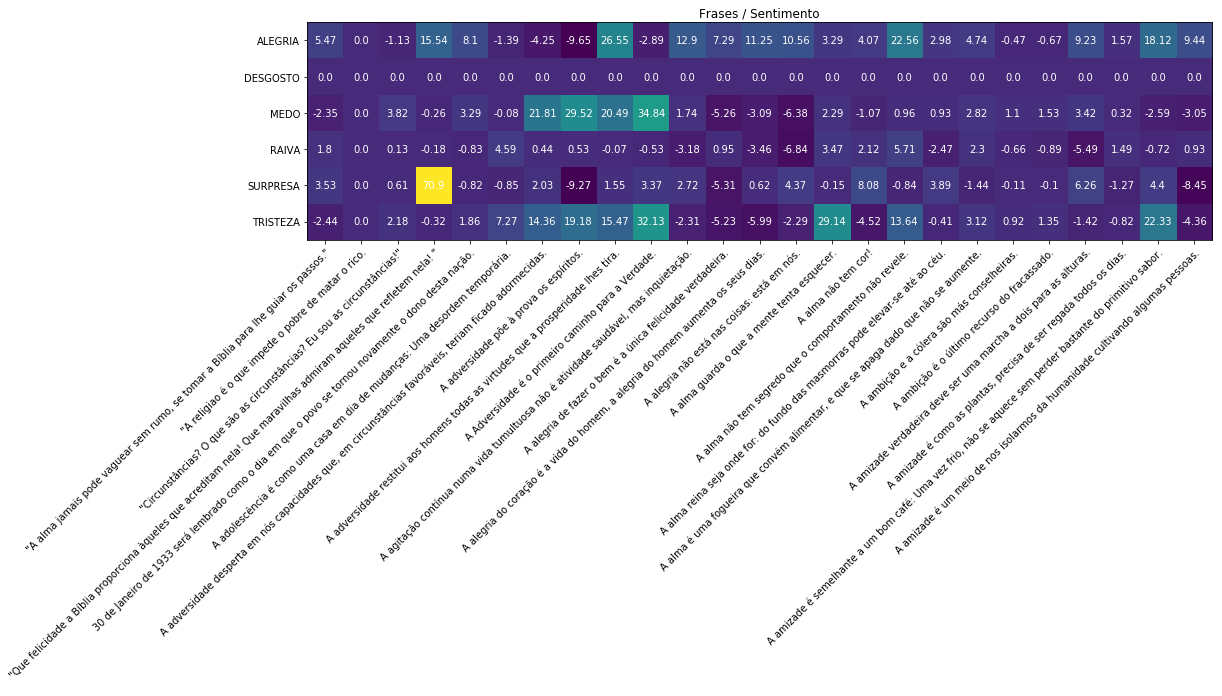

In [13]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [8]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     5.47
DESGOSTO    0.00
MEDO       -2.35
RAIVA       1.80
SURPRESA    3.53
TRISTEZA   -2.44
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     0.0
DESGOSTO    0.0
MEDO        0.0
RAIVA       0.0
SURPRESA    0.0
TRISTEZA    0.0
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA    -1.13
DESGOSTO    0.00
MEDO        3.82
RAIVA       0.13
SURPRESA    0.61
TRISTEZA    2.18
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     15.54
DESGOSTO     0.00
MEDO        -0.26
RAIVA       -0.18
SURPRESA    70.90
TRISTEZA    -0.32
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembra

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [14]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words_n))
    
size = len(original_phrases)
df = pd.DataFrame(predicted, index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 595
--- 0.0055353641510009766 seconds ---
Calculating SVD...
--- 0.004790306091308594 seconds ---
Processing emotional state...
--- 0.034718990325927734 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.017049789428710938 seconds ---
Calculating final emotional matrix...
--- 0.05278420448303223 seconds ---


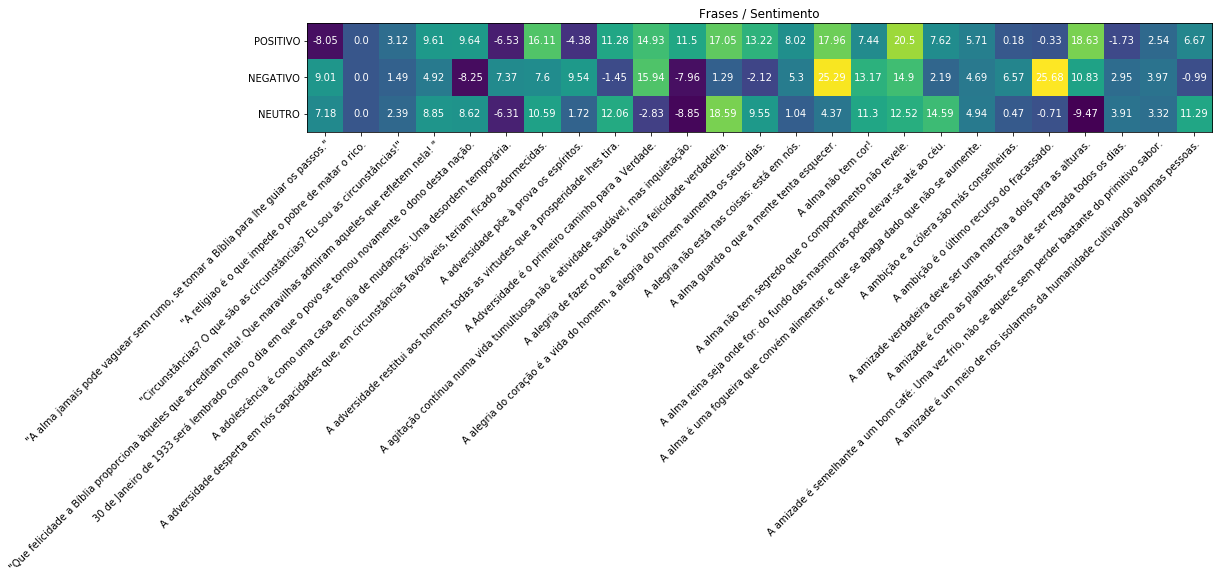

In [15]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

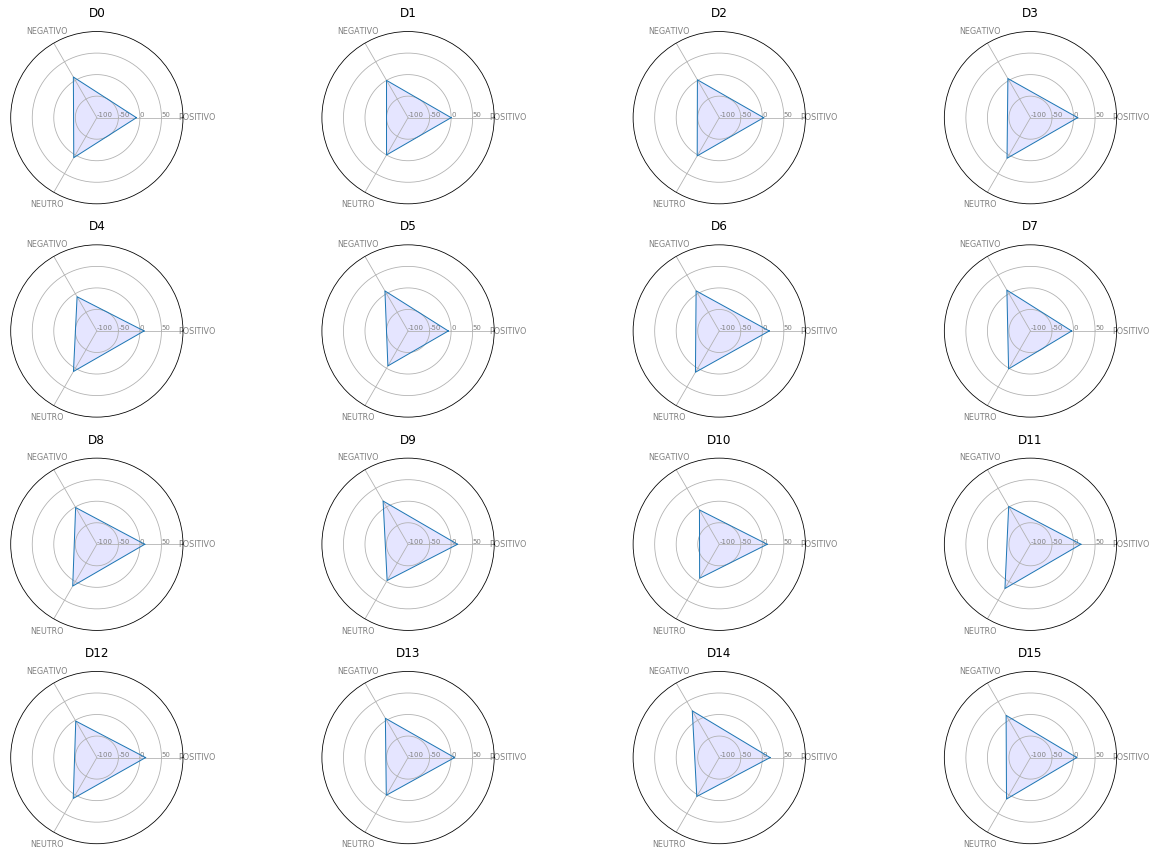

In [16]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [17]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO   -8.05
NEGATIVO    9.01
NEUTRO      7.18
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    0.0
NEGATIVO    0.0
NEUTRO      0.0
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    3.12
NEGATIVO    1.49
NEUTRO      2.39
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    9.61
NEGATIVO    4.92
NEUTRO      8.85
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    9.64
NEGATIVO   -8.25
NEUTRO      8.62
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como uma casa em di

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Dessa base de 40000, serão utilizados apenas 2000 pela grande quantidade de dados e a limitação de hardware que possuímos, os dados serão categorizados em POSITIVO, NEGATIVO e NEUTRO.

In [18]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent = row[2]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [36]:
print(tweets[:10])

['psol vai question aument vereador prefeit bh justic', 'govern min trav disput sobr depósit judic', 'muit dinheir caix govern min ger compr dois helicópter dois helicópter min ger', 'uso aeronav pertencent estad mg doming fins pesso clar desvi final', 'prefeit aimorés decret estad emergent administr', 'risc calot estad uniã cresc', 'min govern usa helicópter govern busc filh fest', 'saiu mineir filh put menor min chup estad merd lix essa porr', 'mg criminal aument pt', 'favor ajud piz pimentel aqu mg maior cabid empreg estad mã coit cheir']


In [19]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4174
--- 0.170074462890625 seconds ---
Calculating SVD...
--- 29.969905138015747 seconds ---
Processing emotional state...
--- 0.296954870223999 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.46846818923950195 seconds ---
Calculating final emotional matrix...
--- 1.060610055923462 seconds ---


In [20]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

Como essa base já esta categorizada, será validada a acurácia do algoritmo implementado, verificando o resultado obtido e comparado com a categoria da frase.

In [21]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 36.0%


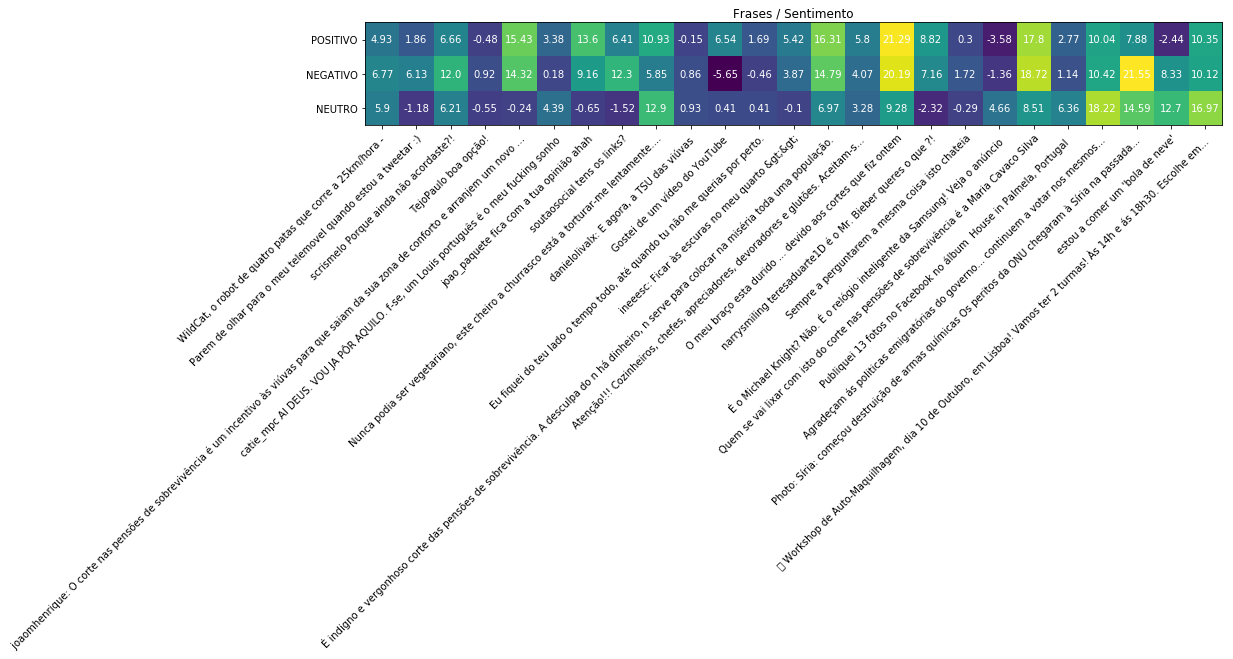

In [22]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [23]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora - 
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    4.93
NEGATIVO    6.77
NEUTRO      5.90
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : NEGATIVO
POSITIVO    1.86
NEGATIVO    6.13
NEUTRO     -1.18
Name: D1, dtype: float64
--------------------
D2 - scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO     6.66
NEGATIVO    12.00
NEUTRO       6.21
Name: D2, dtype: float64
--------------------
D3 - TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO   -0.48
NEGATIVO    0.92
NEUTRO     -0.55
Name: D3, dtype: float64
--------------------
D4 -  joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    15.43
NEGATIVO    14.32
NEUTRO  

### Validação 4

Nesta validação, será utilizado outro conjunto de tweets já previamente categorizados, também com valência POSITIVO, NEGATIVO e NEUTRO.

In [37]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[2]
        tweet_sent = row[9]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:1000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [38]:
for inter_phrases in chunks(tweets, 200):
    inter_ltweets = [f'D{i}' for i in range(len(inter_phrases))]
    print('Starting EmotionalLSA model...')
    model = EmotionalLSA(use_tfidf=True, debug=False)
    print('fit and transform...')
    predicted = model.fit_transform(inter_phrases, copy.deepcopy(emotion_words_n))
    df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())
    
    accuracy = 0
    for i, frase in enumerate(inter_phrases):
        sentimento_original = sents[i].upper()
        calculado = df.loc[f'D{i}'].idxmax(axis=1)
        if sentimento_original == calculado:
            accuracy += 1
    accuracy = np.round((accuracy / len(inter_phrases)) * 100, 2)
    print(f'Accuracy: {accuracy}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy: 27.5%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 31.5%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 24.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 19.5%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 42.0%


In [39]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 2199
--- 0.03186392784118652 seconds ---
Calculating SVD...
--- 1.1233785152435303 seconds ---
Processing emotional state...
--- 0.0038483142852783203 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.13219213485717773 seconds ---
Calculating final emotional matrix...
--- 0.49784255027770996 seconds ---


In [40]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [41]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 31.4%


In [42]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - ���⛪  Catedral de Santo Antônio - Governador Valadares/MG 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    7.76
NEGATIVO   -6.30
NEUTRO      6.16
Name: D0, dtype: float64
--------------------
D1 - �  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO     9.99
NEGATIVO     2.19
NEUTRO      12.57
Name: D1, dtype: float64
--------------------
D2 - ��  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO     9.99
NEGATIVO     2.19
NEUTRO      12.57
Name: D2, dtype: float64
--------------------
D3 - ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
ORIGINAL : NEGATIVO
CALCULADO : POSITIVO
POSITIVO    10.10
NEGATIVO     9.46
NEUTRO       8.63
Name: D3, dtype: float64
--------------------
D4 -  bom é bandido morto. Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas 
ORIGINAL : NEUTRO
CALCULADO : NEGATIVO
POSITIVO

## Validação 5

Nesta validação, será utilizado um dataset taggeado manualmente pelo Edgar e Rodolfo (eu)... Este dataset contém apenas 50 itens balanceados entre POSITIVO, NEGATIVO e NEUTRO.

In [43]:
original_tweets = []
sents1 = []
sents2 = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/50_tweets_mg.csv'
with codecs.open(filename, encoding="utf-8") as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent1 = row[2].upper()
        tweet_sent2 = row[3].upper()
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents1 += [tweet_sent1]
            sents2 += [tweet_sent2]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [44]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 22.0%
Accuracy 2: 28.0%


In [45]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=False, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 26.0%
Accuracy 2: 30.0%


## Validação Dataset PUC-PR

Fornecido pela equipe da PUC-PR através do site [EMOÇÕES.BR](http://www.ppgia.pucpr.br/~paraiso/mineracaodeemocoes/index.php), contém cerca de 1000 frases, categorizadas usando as 6 emoções de Ekman (alegria, surpresa, tristeza, medo, raiva, desgosto).

In [3]:
def carregar(filename):
    frases = []
    with open(filename, 'r') as h:
        reader = csv.reader(h, delimiter='|')
        for row in reader:
            frase = tokenizer(row[0]).strip()
            sentimento = row[1].upper()
            if len(frase) > 5:
                frases.append((sentimento, frase))
    return frases

frases = carregar('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/puc-pr/g1_v1.csv')
shuffle(frases)

phrases = []
for sentimento, frase in frases:
    phrases.append(frase)

print(phrases[:5])

['megainvestidor warren bufet vir bonec eua brinqued distribuíd torcedor omah royals bilionári princip don tim', 'embaix francês cheg rio encontr famíl vítim pierr jean vandorn convers parent autor hotel dev segu aind nest sáb recif', 'eua ret vist diplomát membr govern interin hondurenh med pod ser ampli segund diplomac american eua reafirm nã reconhec govern emposs após golp milit', 'franc perd mil empreg três mes perd trimestr maior tod ano pass demissõ concentr trabalh temporári', 'morr dois fic fer assalt paran vítim segu paragua abord ladrõ dois suspeit det adolescent anos']


In [7]:
inter_lphrases = [f'D{i}' for i in range(len(phrases))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))
df = pd.DataFrame(predicted, index=inter_lphrases, columns=emotion_words.keys())

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4280
--- 0.07732367515563965 seconds ---
Calculating SVD...
--- 6.654653310775757 seconds ---
Processing emotional state...
--- 0.022713661193847656 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.04476118087768555 seconds ---
Calculating final emotional matrix...
--- 1.224541187286377 seconds ---


In [9]:
EMOT = ['alegria', 'desgosto', 'medo', 'raiva', 'surpresa', 'tristeza']
accuracy = 0
missed = 0
for i, frase in enumerate(phrases):
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if calculado == frases[i][0]:
        accuracy += 1
    else:
        missed += 1
accuracy = np.round((accuracy / len(phrases)) * 100, 2)
missed = np.round((missed / len(phrases)) * 100, 2)
print(f'Accuracy: {accuracy}%')
print(f'Missed: {missed}%')

Accuracy: 26.65%
Missed: 73.35%
